In [2]:
import cx_Oracle
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib import rc
rc("font", family = "Malgun Gothic")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import mean_squared_error, mean_squared_log_error 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
import pandas as pd
pd.set_option('display.max_columns', None)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import warnings
warnings.filterwarnings("ignore")

In [44]:
def get_rmsle(model):
    pred = model.predict(X_test)
    pred = np.expm1(pred)  # 로그 역변환 (inverse log transformation)
    y_test_exp = np.expm1(y_test)  # 로그 역변환 (inverse log transformation)
    rmsle = np.sqrt(mean_squared_log_error(y_test_exp, pred))
    print(f"{model.__class__.__name__} RMSLE: {np.round(rmsle, 3)}")
    return rmsle

def get_rmsles(models):
    rmsles = []
    for model in models:
        rmsle = get_rmsle(model)
        rmsles.append(rmsle)
    return rmsles

In [45]:
traindata = pd.read_pickle("../dataset/traindata.pkl")
testdata = pd.read_pickle("../dataset/testdata.pkl")

In [46]:
traindata

,성별,연령대,거주지역,선호제휴점포,가공변화율,가공순증감률,신선변화율,신선순증감률,일상변화율,일상순증감률,의약변화율,의약순증감률,교육변화율,교육순증감률,디지털변화율,디지털순증감률,가구변화율,가구순증감률,의류변화율,의류순증감률,전문스포츠변화율,전문스포츠순증감률,패션변화율,패션순증감률,명품변화율,명품순증감률,기타변화율,기타순증감률,종합변화율,종합순증감률,R rank,F rank,M rank,Label
0,F,노년층,부산,A29,10,2,1,-1,9,-1,1,-1,3,-1,0,0,7,1,7,1,3,-1,11,-3,3,-1,15,1,0,0,9,4,8,66.22
1,F,노년층,서울,A2,13,1,7,1,16,0,3,-3,0,0,5,1,4,0,7,3,4,0,0,0,1,-1,15,1,4,0,5,4,10,181.64
2,F,노년층,서울,B7,7,1,9,-3,14,2,1,-1,2,0,0,0,2,0,5,-3,5,1,8,-2,1,-1,9,-1,7,1,1,8,5,124.31
3,F,노년층,서울,C195,9,-3,10,-1,15,-1,1,-1,0,0,0,0,3,-1,5,1,3,-1,4,0,1,-1,20,4,4,2,5,7,3,143.69
4,F,노년층,서울,A20,8,2,16,3,5,1,1,-1,0,0,8,0,8,0,6,0,7,-1,10,2,2,0,17,-5,8,0,1,2,9,316.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,F,청년층,서울,B27,0,0,5,1,3,1,4,0,0,0,0,0,4,0,3,-1,3,-1,2,0,1,-1,7,-1,11,9,9,2,8,1165.86
19379,F,중년층,경북,C79,6,-2,4,-1,4,0,3,-1,0,0,0,0,3,-1,1,-1,4,2,1,-1,1,-1,4,-2,4,0,5,10,3,84.65
19380,M,청년층,부산,C238,9,1,10,4,7,1,1,-1,0,0,0,0,2,0,11,3,6,4,0,0,1,-1,5,-1,7,5,5,8,6,322.59
19381,F,중년층,서울,C153,7,1,2,0,4,-2,1,-1,0,0,0,0,2,0,1,-1,3,-1,1,-1,1,-1,6,0,3,-1,7,8,2,76.96


In [9]:
testdata

,성별,연령대,거주지역,선호제휴점포,가공변화율,가공순증감률,신선변화율,신선순증감률,일상변화율,일상순증감률,...,명품변화율,명품순증감률,기타변화율,기타순증감률,종합변화율,종합순증감률,R rank,F rank,M rank,Label
0,F,노년층,부산,A29,11,1,1,-1,9,-1,...,4,-1,18,5,1,-1,1,4,8,173.76
1,F,노년층,서울,A2,16,4,7,4,16,7,...,2,0,18,5,3,1,9,4,10,114.58
2,F,노년층,서울,B7,7,2,9,2,18,-2,...,1,0,9,-4,7,1,5,8,5,65.52
3,F,노년층,서울,C195,11,3,10,3,16,-4,...,1,0,27,-2,6,0,1,7,2,180.39
4,F,노년층,서울,A20,10,3,17,-4,5,0,...,2,1,17,-4,6,2,1,3,9,99.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,F,청년층,서울,B27,0,0,5,2,3,2,...,1,0,7,0,12,8,1,2,8,319.37
19379,F,중년층,경북,C79,7,-5,5,-3,5,-2,...,1,0,6,-4,2,-2,1,10,3,44.12
19380,M,청년층,부산,C238,10,2,11,6,11,5,...,1,0,7,-2,7,5,1,8,6,77.59
19381,F,중년층,서울,C153,10,-3,3,1,5,-1,...,1,0,9,-2,3,-1,1,8,2,76.06


In [10]:
traindata["Label"] = np.log1p(traindata["Label"])
testdata["Label"] = np.log1p(testdata["Label"])

In [11]:
train_ohe = pd.get_dummies(traindata)
test_ohe = pd.get_dummies(testdata)

In [12]:
y_train = train_ohe["Label"]
y_test = test_ohe["Label"]

X_train = train_ohe.drop(["Label"], axis = 1)
X_test = test_ohe.drop(["Label"], axis = 1)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmsles(models)

LinearRegression RMSLE: 0.784
Ridge RMSLE: 0.781
Lasso RMSLE: 0.802


[0.7837897548890038, 0.7807578245227208, 0.8016386740843904]

In [14]:
coef = pd.Series(lr.coef_, index = X_train.columns)
coef

가공변화율        0.002067
가공순증감률       0.020824
신선변화율        0.003430
신선순증감률       0.023862
일상변화율       -0.002208
               ...   
선호제휴점포_D5   -0.515829
선호제휴점포_D6   -0.688216
선호제휴점포_D7    0.130117
선호제휴점포_D8   -0.290951
선호제휴점포_D9    0.237242
Length: 722, dtype: float64

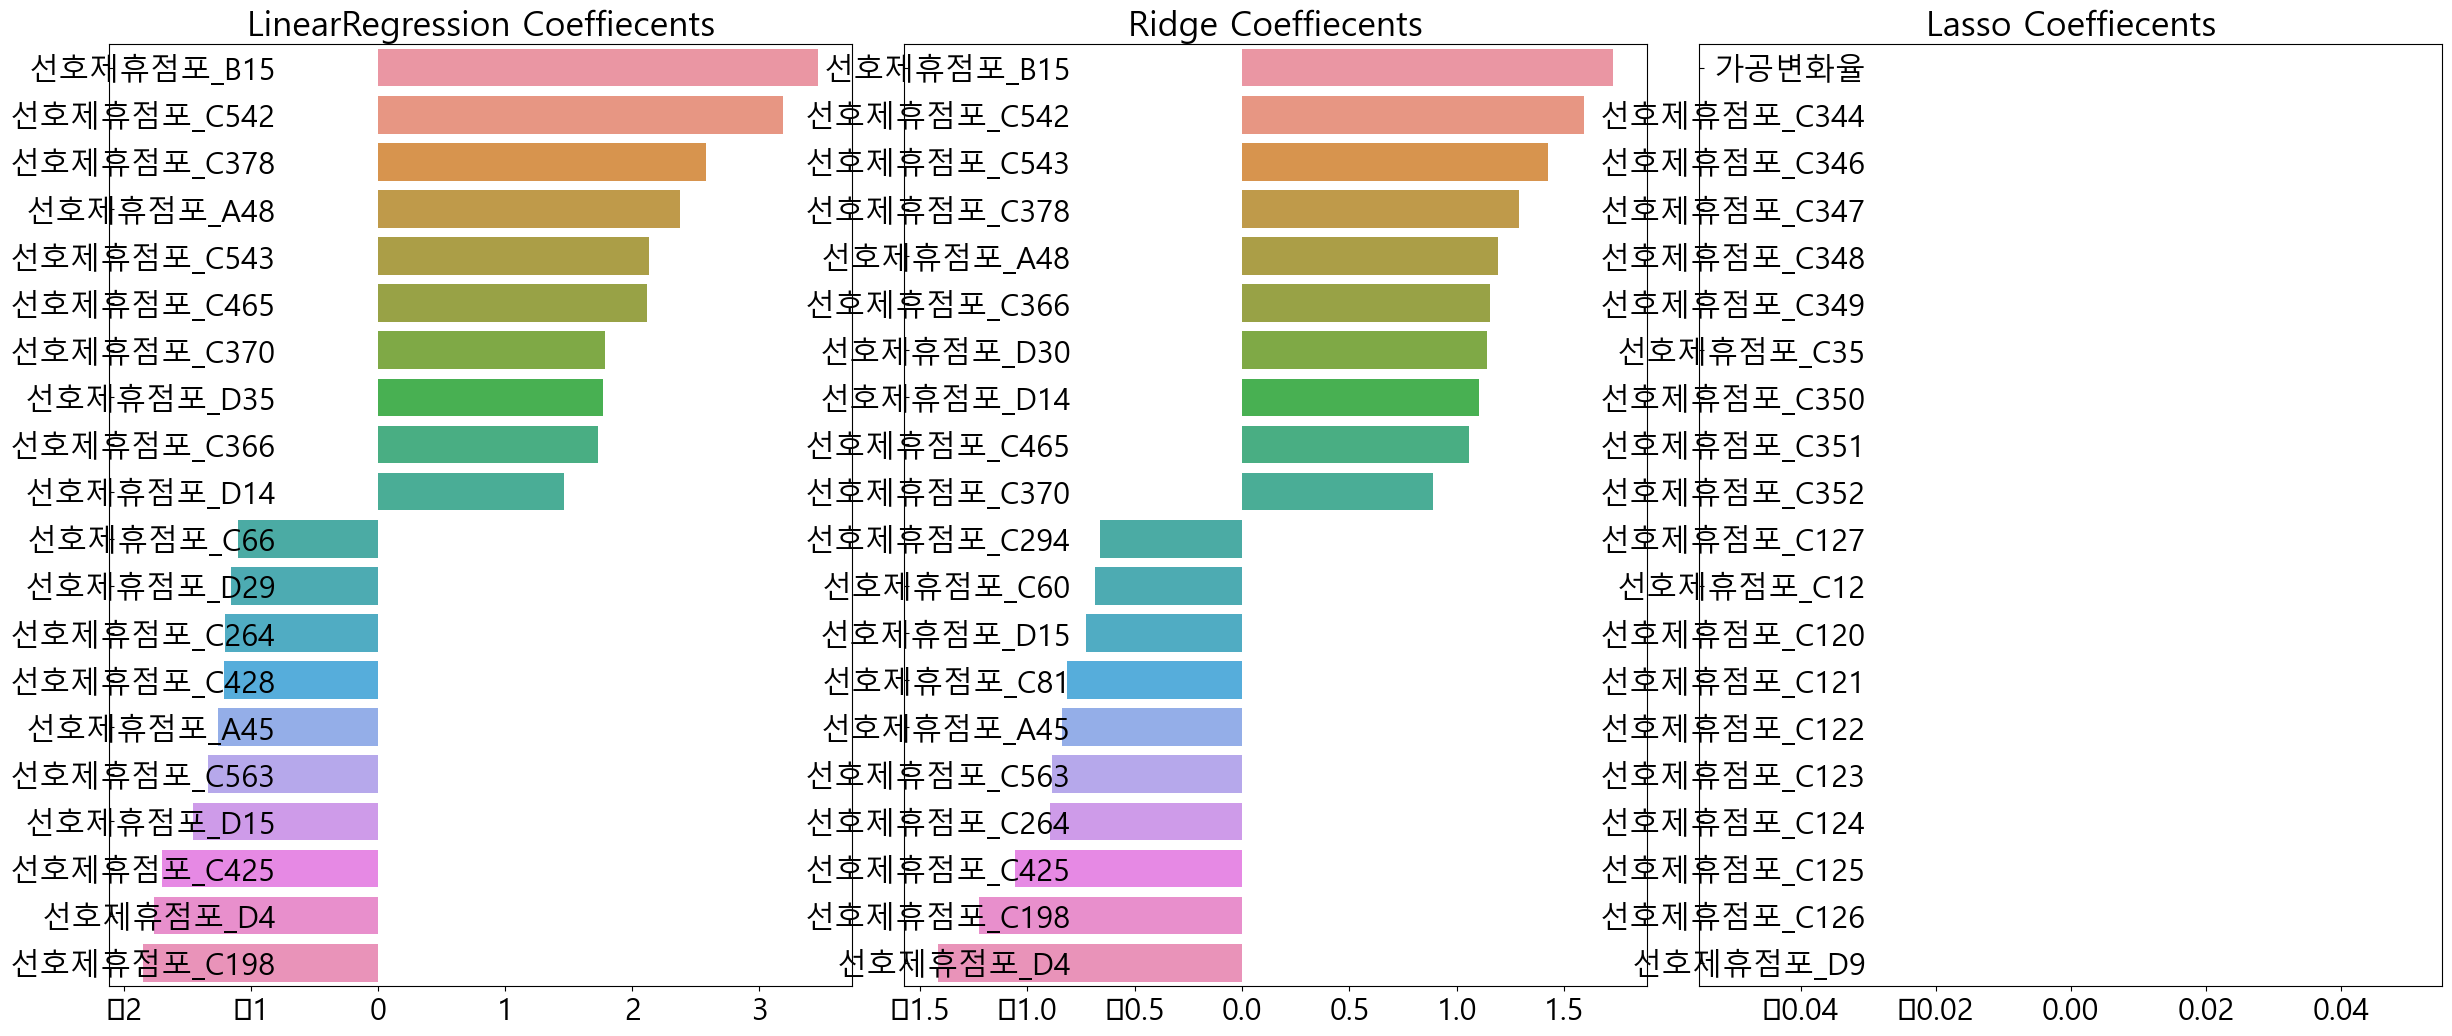

In [15]:
def get_top_bottom_coef(model):
    coef = pd.Series(model.coef_, index = X_train.columns)
    
    coef_high = coef.sort_values(ascending = False).head(10)
    coef_low = coef.sort_values(ascending = False).tail(10)
    return coef_high, coef_low

def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr, ridge, lasso]
visualize_coefficient(models)

In [16]:
def compare_arrays(arr1, arr2):
    count = 0
    for i in range(len(arr1)):
        if arr1[i] == arr2[i]:
            count += 1
    return count

def convert_values(arr):
    result = []
    for value in arr:
        if value < 85:
            result.append(3)
        elif value < 115:
            result.append(2)
        else:
            result.append(1)
    return result

def get_scores(arr1, arr2):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(arr1)):
        if arr2[i] == 3 and arr1[i] == 3:
            TP += 1
        elif arr2[i] == 3 and arr1[i] != 3:
            FN += 1
        elif arr2[i] != 3 and arr1[i] != 3:
            TN += 1
        else:
            FP += 1
    print(f"[{TP}   {FP}]\n[{FN}   {TN}]")
    print(f"정밀도 : {round(TP/ (FP+TP)*100,2)}%")
    print(f"재현율 : {round(TP/ (FN+TP)*100,2)}%")
    print(f"정확도 : {round((TP+TN)/len(arr1)*100,2)}%")

In [17]:
pre = np.expm1(ridge.predict(X_test))
real = np.array(np.expm1(y_test))
pre_cat = convert_values(pre)
real_cat = convert_values(real)
matching_count = compare_arrays(pre_cat, real_cat)
print(matching_count)
round(matching_count/len(pre)*100,2)

7577


40.16

In [18]:
get_scores(pre_cat, real_cat)

[2211   2445]
[4639   9571]
정밀도 : 47.49%
재현율 : 32.28%
정확도 : 62.45%


In [19]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params, scoring = "neg_mean_squared_error", cv = 5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print("{0} 5 CV 시 최적 평균 RMSE 값 : {1}, 최적 alpha : {2}".format(model.__class__.__name__,
                                                                np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [21]:
ridge_params = {"alpha" : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50]}
lasso_params = {"alpha" : [0.00001, 0.0001, 0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1.5, 10]}
best_ridge = print_best_params(ridge, ridge_params)
best_lasso = print_best_params(lasso, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.7077, 최적 alpha : {'alpha': 50}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.7085, 최적 alpha : {'alpha': 0.001}


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge(alpha = 50)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

models = [lr, ridge, lasso]
get_rmsles(models)

LinearRegression RMSLE: 0.784
Ridge RMSLE: 0.776
Lasso RMSLE: 0.775


[0.7837897548890038, 0.7761641871490369, 0.7752635841413529]

In [23]:
pre = np.expm1(ridge.predict(X_test))
real = np.array(np.expm1(y_test))
pre_cat = convert_values(pre)
real_cat = convert_values(real)
matching_count = compare_arrays(pre_cat, real_cat)
print(matching_count)
round(matching_count/len(pre)*100,2)

7521


39.87

In [24]:
get_scores(pre_cat, real_cat)

[2098   2301]
[4752   9715]
정밀도 : 47.69%
재현율 : 30.63%
정확도 : 62.62%


In [6]:
cd['R 등급'].value_counts()

1    14844
2     2907
3     1359
4      236
5       37
Name: R 등급, dtype: int64

<AxesSubplot:xlabel='R 등급', ylabel='Count'>

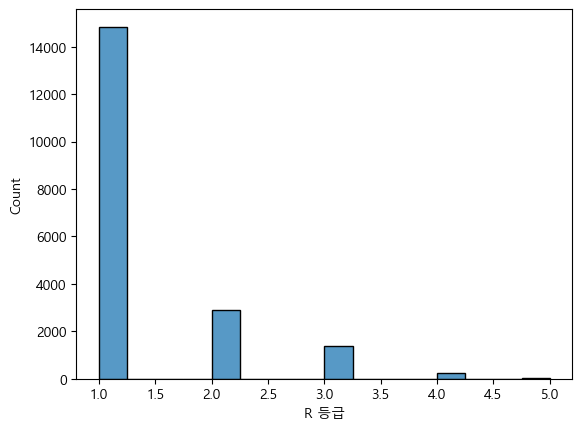

In [8]:
sns.histplot(cd['R 등급'])

In [11]:
cd['F 등급'].value_counts()

11    1945
9     1944
6     1941
4     1940
8     1939
3     1939
5     1935
10    1934
7     1931
2     1808
1      127
Name: F 등급, dtype: int64

<AxesSubplot:xlabel='F 등급', ylabel='Count'>

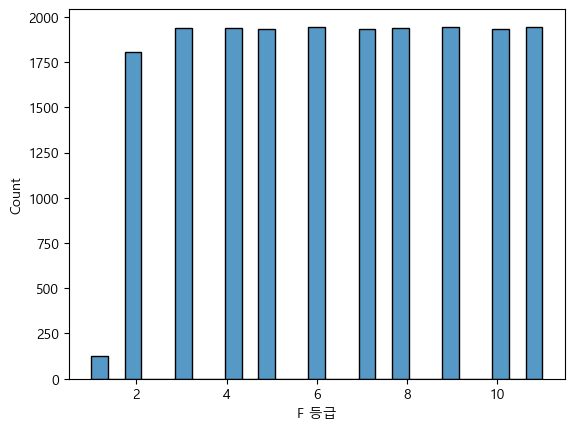

In [10]:
sns.histplot(cd['F 등급'])

In [12]:
cd['M 등급'].value_counts()

11    2211
8     2095
3     1979
5     1979
7     1901
9     1872
4     1853
6     1827
10    1766
2     1038
1      862
Name: M 등급, dtype: int64

<AxesSubplot:xlabel='M 등급', ylabel='Count'>

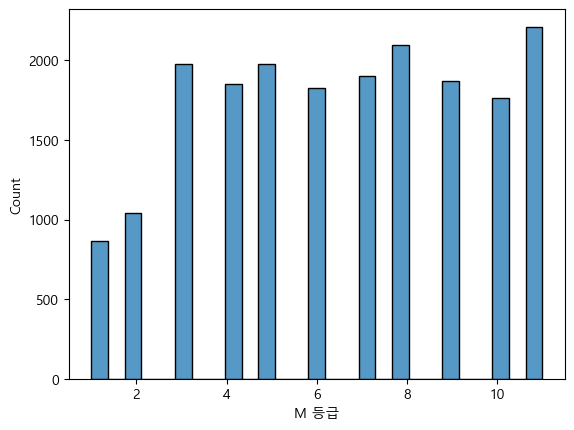

In [9]:
sns.histplot(cd['M 등급'])

In [27]:
cd['F 등급'].unique()

array([10,  5,  7,  8, 11,  9,  6,  2,  4,  3,  1], dtype=int64)

In [30]:
def get_f(num):
    cat = ''
    if num <= 2 : cat = 1
    elif num <= 4 : cat = 2
    elif num <= 6 : cat = 3
    elif num <= 8 : cat = 4
    else : cat = 5
    return cat

cd['F_cate'] = cd['F 등급'].apply(lambda x : get_f(x))
cd['F_cate'].value_counts()

cd.head()

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율,F_cate
0,00752,M,60세이상,440,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55,5
1,00754,F,60세이상,055,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73,5
2,00756,F,60세이상,024,3.0,11.0,11.0,NaN,C,11,C11,1874674.0,4469948.0,3135032.0,2047996.0,970862.0,5729412.0,886631.0,2349480.0,2589564.0,-1382068.0,-943947.0,-1157567.0,4735713.0,-4830118.0,1563748.0,1,1656,21430060,12940.86,575325.0,0,1,5,6,6,238.44,70.14,65.33,47.41,590.14,15.48,264.99,3
3,00758,F,60세이상,100,37.0,54.0,NaN,NaN,A,37,A37,3879096.0,25507579.0,5745857.0,5290043.0,10555637.0,27922567.0,9408581.0,25724991.0,21522006.0,-19747326.0,-141111.0,4970621.0,17318743.0,-18571023.0,17414192.0,1,1124,114271870,101665.36,22766102.0,0,1,7,2,2,657.57,22.53,92.07,199.54,264.53,33.70,273.42,4
4,00781,F,60세이상,016,20.0,8.0,127.0,7.0,A,20,A20,15355430.0,10310139.0,7757226.0,13536428.0,6528618.0,17731116.0,2889035.0,7870962.0,-4938920.0,-2673950.0,6422360.0,-7540650.0,11170010.0,-14806280.0,5318052.0,1,1051,82060822,78078.80,-7049378.0,1,1,8,2,3,67.14,75.24,174.50,48.23,271.59,16.29,272.44,4


In [31]:
def get_m(num):
    cat = ''
    if num <= 2 : cat = 1
    elif num <= 4 : cat = 2
    elif num <= 6 : cat = 3
    elif num <= 8 : cat = 4
    else : cat = 5
    return cat

cd['M_cate'] = cd['M 등급'].apply(lambda x : get_f(x))
cd['M_cate'].value_counts()

5    5849
4    3996
2    3832
3    3806
1    1900
Name: M_cate, dtype: int64

In [38]:
cdf = cd[['고객번호','R 등급', 'F_cate', 'M_cate']]
cdf

,고객번호,R 등급,F_cate,M_cate
0,00752,1,5,2
1,00754,2,5,2
2,00756,1,3,3
3,00758,1,4,1
4,00781,1,4,1
...,...,...,...,...
19378,03273,1,3,4
19379,07025,1,4,2
19380,08931,1,1,2
19381,14871,2,5,3


<AxesSubplot:xlabel='F_cate', ylabel='Count'>

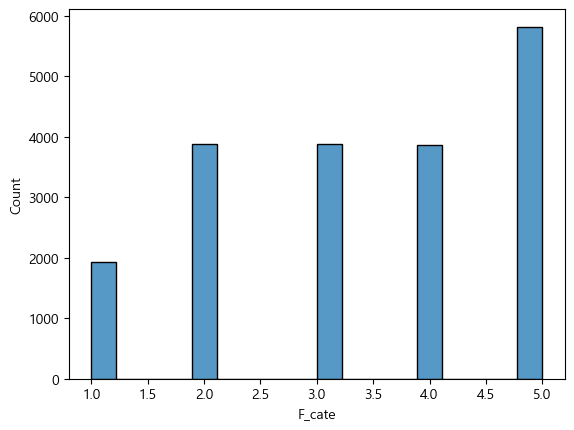

In [35]:
sns.histplot(cd['F_cate'])

<AxesSubplot:xlabel='M_cate', ylabel='Count'>

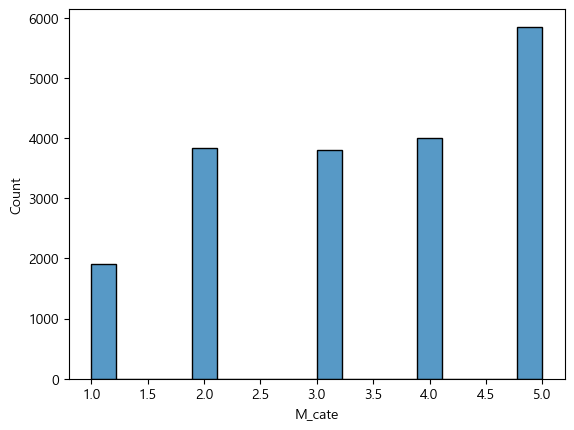

In [36]:
sns.histplot(cd['M_cate'])

In [39]:
cdf

,고객번호,R 등급,F_cate,M_cate
0,00752,1,5,2
1,00754,2,5,2
2,00756,1,3,3
3,00758,1,4,1
4,00781,1,4,1
...,...,...,...,...
19378,03273,1,3,4
19379,07025,1,4,2
19380,08931,1,1,2
19381,14871,2,5,3


In [5]:
df = pd.read_pickle('../dataset/customerdata.pkl')
df.head(3)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,60세이상,440,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
1,00754,F,60세이상,055,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73
2,00756,F,60세이상,024,3.0,11.0,11.0,NaN,C,11,C11,1874674.0,4469948.0,3135032.0,2047996.0,970862.0,5729412.0,886631.0,2349480.0,2589564.0,-1382068.0,-943947.0,-1157567.0,4735713.0,-4830118.0,1563748.0,1,1656,21430060,12940.86,575325.0,0,1,5,6,6,238.44,70.14,65.33,47.41,590.14,15.48,264.99


In [9]:
df = pd.read_pickle('../dataset/scustomerdata.pkl')
df.head(3)

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,노년층,울산,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,일상용품,패션잡화,가공식품,일상용품,패션잡화,가공식품,디지털/가전,패션잡화,일상용품,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
1,00754,F,노년층,서울,2.0,13.0,13.0,NaN,A,2,A2,5648899.0,6560856.0,4868150.0,19591410.0,3494579.0,4871427.0,1973879.0,12647258.0,934973.0,-1768137.0,15505680.0,-16803490.0,1386354.0,-2915258.0,11151190.0,6,619,60431637,97627.85,가공식품,일상용품,신선식품,가공식품,일상용품,신선식품,신선식품,일상용품,가공식품,7491312.0,0,2,10,3,3,116.14,74.20,402.44,17.84,139.40,40.52,640.73
2,00758,F,노년층,서울,37.0,54.0,NaN,NaN,A,37,A37,3879096.0,25507579.0,5745857.0,5290043.0,10555637.0,27922567.0,9408581.0,25724991.0,21522006.0,-19747326.0,-141111.0,4970621.0,17318743.0,-18571023.0,17414192.0,1,1124,114271870,101665.36,일상용품,가공식품,신선식품,가공식품,일상용품,신선식품,신선식품,가공식품,일상용품,22766102.0,0,1,7,2,2,657.57,22.53,92.07,199.54,264.53,33.70,273.42


In [ ]:
파이차트에서 선호상품 1이 뭔지 찾아보자
X_features['선호상품1'].value_counts() -> 0~11의 값
감소고객의 선호상품 순서는 가공 > 신선 > 일상

In [11]:
ddf = df[df['감소고객']==1]
ddf.head()

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,노년층,울산,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,일상용품,패션잡화,가공식품,일상용품,패션잡화,가공식품,디지털/가전,패션잡화,일상용품,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
6,00804,M,노년층,서울,37.0,25.0,494.0,NaN,C,494,C494,1563928.0,1230394.0,1283560.0,1227921.0,988527.0,1135421.0,1098306.0,690060.0,-323750.0,30370.0,16238.0,-292023.0,150995.0,-56140.0,-359054.0,1,1143,9186559,8037.23,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-833364.0,1,1,7,10,8,78.67,104.32,95.67,80.50,114.86,96.73,62.83
7,00808,F,노년층,서울,20.0,11.0,18.0,7.0,A,20,A20,5585831.0,6112428.0,3863930.0,9574409.0,4918859.0,7476651.0,7946227.0,3775377.0,551540.0,-2303100.0,6127510.0,-5035694.0,2567564.0,327630.0,-3856493.0,2,1563,49240813,31504.04,일상용품,신선식품,가공식품,일상용품,가공식품,신선식품,일상용품,가공식품,신선식품,-1621043.0,1,1,5,4,4,109.43,63.21,247.79,51.38,152.00,106.28,47.51
8,00811,F,노년층,서울,20.0,8.0,40.0,NaN,A,20,A20,9283103.0,3055057.0,4986917.0,5951533.0,19115281.0,19497334.0,4143365.0,5672092.0,-6145236.0,1833245.0,1284185.0,12753437.0,475677.0,-15337162.0,1819068.0,5,884,71449314,80825.02,일상용품,신선식품,가공식품,일상용품,신선식품,가공식품,가공식품,신선식품,일상용품,-3316786.0,1,2,9,3,3,32.91,163.23,119.34,321.18,102.00,21.25,136.90
11,00880,F,노년층,부산,29.0,107.0,NaN,NaN,B,107,B107,1669350.0,1043677.0,1649462.0,2010143.0,1116889.0,1580285.0,1638626.0,1087577.0,-613660.0,573361.0,467802.0,-973977.0,466298.0,29294.0,-475675.0,2,1618,11779535,7280.31,신선식품,가공식품,일상용품,신선식품,가공식품,일상용품,일상용품,가공식품,신선식품,-526557.0,1,1,5,9,9,62.52,158.04,121.87,55.56,141.49,103.69,66.37


In [12]:
ddf['선호제품1']

0        일상용품
6        가공식품
7        일상용품
8        일상용품
11       신선식품
         ... 
19369    가공식품
19372    가공식품
19373    가공식품
19374    가공식품
19382    가공식품
Name: 선호제품1, Length: 8064, dtype: object

In [13]:
def make_pie(df, column):
    count = df[column].value_counts().sort_index()
    index = list(count.index)
    value = list(count)
    
    a = plt.pie(value, labels=index, autopct='%1.1f%%')
    plt.title(f"DataFrame {column} Cluster Pie Chart")

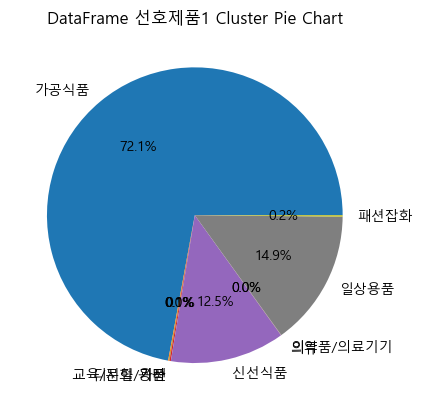

In [14]:
make_pie(ddf,'선호제품1')

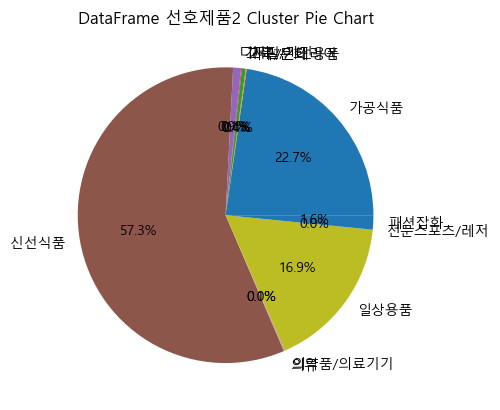

In [15]:
make_pie(ddf,'선호제품2')

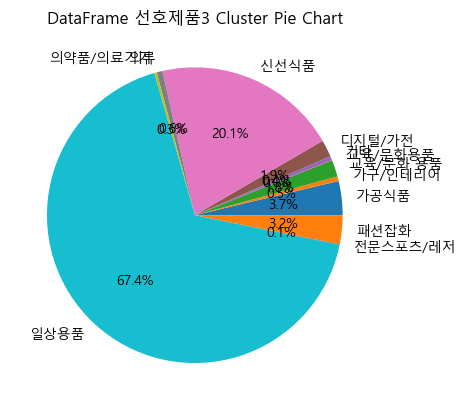

In [16]:
make_pie(ddf,'선호제품3')

In [21]:
ddf.head()

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,선호제품1,선호제품2,선호제품3,선호제품14_1,선호제품14_2,선호제품14_3,선호제품15_3,선호제품15_2,선호제품15_1,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
0,00752,M,노년층,울산,14.0,NaN,NaN,NaN,A,14,A14,8204832.0,3889436.0,4091932.0,3373364.0,4700689.0,5258195.0,7600201.0,7109948.0,-4249130.0,129630.0,-507900.0,1161230.0,577830.0,2195220.0,-70140.0,1,627,44120440,70367.53,일상용품,패션잡화,가공식품,일상용품,패션잡화,가공식품,디지털/가전,패션잡화,일상용품,-763260.0,1,1,10,4,3,47.40,105.21,82.44,139.35,111.86,144.54,93.55
6,00804,M,노년층,서울,37.0,25.0,494.0,NaN,C,494,C494,1563928.0,1230394.0,1283560.0,1227921.0,988527.0,1135421.0,1098306.0,690060.0,-323750.0,30370.0,16238.0,-292023.0,150995.0,-56140.0,-359054.0,1,1143,9186559,8037.23,가공식품,신선식품,일상용품,가공식품,신선식품,일상용품,일상용품,신선식품,가공식품,-833364.0,1,1,7,10,8,78.67,104.32,95.67,80.50,114.86,96.73,62.83
7,00808,F,노년층,서울,20.0,11.0,18.0,7.0,A,20,A20,5585831.0,6112428.0,3863930.0,9574409.0,4918859.0,7476651.0,7946227.0,3775377.0,551540.0,-2303100.0,6127510.0,-5035694.0,2567564.0,327630.0,-3856493.0,2,1563,49240813,31504.04,일상용품,신선식품,가공식품,일상용품,가공식품,신선식품,일상용품,가공식품,신선식품,-1621043.0,1,1,5,4,4,109.43,63.21,247.79,51.38,152.00,106.28,47.51
8,00811,F,노년층,서울,20.0,8.0,40.0,NaN,A,20,A20,9283103.0,3055057.0,4986917.0,5951533.0,19115281.0,19497334.0,4143365.0,5672092.0,-6145236.0,1833245.0,1284185.0,12753437.0,475677.0,-15337162.0,1819068.0,5,884,71449314,80825.02,일상용품,신선식품,가공식품,일상용품,신선식품,가공식품,가공식품,신선식품,일상용품,-3316786.0,1,2,9,3,3,32.91,163.23,119.34,321.18,102.00,21.25,136.90
11,00880,F,노년층,부산,29.0,107.0,NaN,NaN,B,107,B107,1669350.0,1043677.0,1649462.0,2010143.0,1116889.0,1580285.0,1638626.0,1087577.0,-613660.0,573361.0,467802.0,-973977.0,466298.0,29294.0,-475675.0,2,1618,11779535,7280.31,신선식품,가공식품,일상용품,신선식품,가공식품,일상용품,일상용품,가공식품,신선식품,-526557.0,1,1,5,9,9,62.52,158.04,121.87,55.56,141.49,103.69,66.37


In [89]:
customerdata = customerdata.sort_values('고객번호')

In [104]:
X_features

NameError: name 'X_features' is not defined

In [32]:
predictdata = pd.read_pickle('../dataset/train2.pkl')
predictdata.head()

,성별,연령대분류,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,전문스포츠변화,패션잡화변화,명품변화,기타변화,ABS가공,ABS신선,ABS일상,ABS의약,ABS교육,ABS디지털,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,CAGR
0,M,노년층,-6,0,-1,0,0,-7,0,-1,6,0,-8,0,6,14,17,14,0,29,20,1,12,18,24,2,4,4,1,-10.91
1,M,노년층,0,0,0,0,0,-9,0,0,-1,-2,0,-9,14,2,0,18,0,45,34,4,5,8,18,25,4,4,1,-11.55
2,M,노년층,-2,-3,0,0,0,-8,0,0,0,3,0,-2,4,5,4,0,0,8,0,0,0,3,0,4,3,5,10,-6.03
3,F,노년층,3,2,-5,0,0,0,-8,-2,-8,-2,0,3,13,6,9,14,0,0,26,4,12,12,16,29,8,3,6,-9.79
4,M,노년층,2,-1,-1,0,0,0,-9,1,-6,-2,0,0,28,11,23,12,0,0,9,23,6,8,0,0,3,2,7,8.33


In [38]:
clusterdata = pd.read_pickle('../dataset/clusterdata.pkl')
clusterdata

,성별,연령대,거주지역,A구매여부,B구매여부,C구매여부,D구매여부,선호제휴사,선호제휴점포,선호상품1,선호상품2,선호상품3,R,F,M,CAGR,LABEL,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,전문스포츠변화,패션잡화변화,명품변화,기타변화,ABS가공,ABS신선,ABS일상,ABS의약,ABS교육,ABS디지털,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타
0,1,0,7,1,1,1,0,0,3,4,1,3,3,3,0,0,1,-6,0,-1,0,0,-7,0,-1,6,0,-8,0,6,14,17,14,0,29,20,1,12,18,24,2
1,1,0,7,1,1,0,1,0,44,9,10,4,3,3,0,0,1,0,0,0,0,0,-9,0,0,-1,-2,0,-9,14,2,0,18,0,45,34,4,5,8,18,25
2,1,0,7,1,1,1,0,2,419,6,0,9,2,4,9,4,0,-2,-3,0,0,0,-8,0,0,0,3,0,-2,4,5,4,0,0,8,0,0,0,3,0,4
3,0,0,7,1,1,1,0,0,12,3,10,6,7,2,5,1,1,3,2,-5,0,0,0,-8,-2,-8,-2,0,3,13,6,9,14,0,0,26,4,12,12,16,29
4,1,0,7,1,1,0,1,0,44,0,1,6,2,1,6,7,0,2,-1,-1,0,0,0,-9,1,-6,-2,0,0,28,11,23,12,0,0,9,23,6,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,0,4,7,1,1,1,1,3,651,8,9,11,1,0,9,7,0,1,0,5,9,0,0,0,5,0,5,8,0,1,0,7,13,0,16,0,11,0,21,8,12
19379,0,4,7,1,1,1,1,3,667,9,8,0,5,0,9,8,0,2,0,9,7,0,8,0,0,0,0,0,3,2,2,13,23,16,24,0,0,0,8,0,3
19380,0,2,6,1,1,1,0,1,58,8,6,0,5,2,9,8,0,6,7,5,7,0,0,6,0,0,3,0,4,8,11,5,9,0,0,10,12,10,7,0,8
19381,0,1,6,1,1,1,0,1,58,8,6,0,5,2,9,7,0,7,6,1,8,0,0,6,2,0,4,0,5,7,6,3,10,0,0,18,10,12,12,0,5


In [90]:
# customerdata =pd.read_pickle('../dataset/customerdata.pkl')
# customerdata

a= customerdata[['성별','연령대', '거주지역','A선호점포','B선호점포','C선호점포','D선호점포','선호제휴사']]

In [103]:
a

,gender,선호제휴사,age,region,A선호,B선호,C선호,D선호
18943,M,A,노년층,서울,1,1,1,0
19240,M,A,노년층,서울,1,1,0,1
17127,M,C,노년층,서울,1,1,1,0
10661,F,A,노년층,서울,1,1,1,0
6104,M,A,노년층,서울,1,1,0,1
...,...,...,...,...,...,...,...,...
11755,F,D,학생층,서울,1,1,1,1
18003,F,D,학생층,서울,1,1,1,1
18600,F,B,중년층,부산,1,1,1,0
3291,F,B,장년층,부산,1,1,1,0


In [91]:
def get_age(x):
    cat = ''
    if x == "19세 이하" or x == "20세~24세": cat = "학생층"
    elif x == "25세~29세" or x == "30세~34세": cat = "청년층"
    elif x == "35세~39세" or x == "40세~44세": cat = "중년층"
    elif x == "45세~49세" or x == "50세~54세": cat = "장년층"
    else : cat = "노년층"
    
    return cat

def get_region(x):
    cat = ''
    if x == "110": cat = "경기"
    elif x == "210": cat = "인천"
    elif x == "240": cat = "강원"
    elif x == "270": cat = "충북"
    elif x == "300": cat = "세종"
    elif x == "310": cat = "충남"
    elif x == "340": cat = "대전"
    elif x == "360": cat = "경북"
    elif x == "410": cat = "대구"
    elif x == "440": cat = "울산"
    elif x == "460": cat = "부산"
    elif x == "500": cat = "경남"
    elif x == "540": cat = "전북"
    elif x == "570": cat = "전남"
    elif x == "610": cat = "광주"
    elif x == "630": cat = "제주"
    else : cat = "서울"
    
    return cat

In [92]:
a['age'] = a.연령대.apply(lambda x:get_age(x)) 
a

,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,age
18943,M,60세이상,060,12.0,13.0,96.0,NaN,A,노년층
19240,M,60세이상,100,7.0,18.0,NaN,33.0,A,노년층
17127,M,60세이상,033,1.0,9.0,34.0,NaN,C,노년층
10661,F,60세이상,016,20.0,8.0,19.0,NaN,A,노년층
6104,M,60세이상,100,7.0,18.0,NaN,33.0,A,노년층
...,...,...,...,...,...,...,...,...,...
11755,F,20세~24세,069,9.0,9.0,242.0,15.0,D,학생층
18003,F,20세~24세,039,2.0,9.0,308.0,3.0,D,학생층
18600,F,40세~44세,460,47.0,108.0,241.0,NaN,B,중년층
3291,F,45세~49세,460,47.0,108.0,241.0,NaN,B,장년층


In [93]:
a['region'] = a.거주지역.apply(lambda x:get_region(x)) 
a

,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,age,region
18943,M,60세이상,060,12.0,13.0,96.0,NaN,A,노년층,서울
19240,M,60세이상,100,7.0,18.0,NaN,33.0,A,노년층,서울
17127,M,60세이상,033,1.0,9.0,34.0,NaN,C,노년층,서울
10661,F,60세이상,016,20.0,8.0,19.0,NaN,A,노년층,서울
6104,M,60세이상,100,7.0,18.0,NaN,33.0,A,노년층,서울
...,...,...,...,...,...,...,...,...,...,...
11755,F,20세~24세,069,9.0,9.0,242.0,15.0,D,학생층,서울
18003,F,20세~24세,039,2.0,9.0,308.0,3.0,D,학생층,서울
18600,F,40세~44세,460,47.0,108.0,241.0,NaN,B,중년층,부산
3291,F,45세~49세,460,47.0,108.0,241.0,NaN,B,장년층,부산


In [94]:
def get_nan(x):
    cat = ''
    if np.isnan(x) : cat=0
    else : cat = 1
    return cat

In [95]:
a['A선호'] = a.A선호점포.apply(lambda x:get_nan(x)) 
a['B선호'] = a.B선호점포.apply(lambda x:get_nan(x))
a['C선호'] = a.C선호점포.apply(lambda x:get_nan(x)) 
a['D선호'] = a.D선호점포.apply(lambda x:get_nan(x)) 
a

,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,age,region,A선호,B선호,C선호,D선호
18943,M,60세이상,060,12.0,13.0,96.0,NaN,A,노년층,서울,1,1,1,0
19240,M,60세이상,100,7.0,18.0,NaN,33.0,A,노년층,서울,1,1,0,1
17127,M,60세이상,033,1.0,9.0,34.0,NaN,C,노년층,서울,1,1,1,0
10661,F,60세이상,016,20.0,8.0,19.0,NaN,A,노년층,서울,1,1,1,0
6104,M,60세이상,100,7.0,18.0,NaN,33.0,A,노년층,서울,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,F,20세~24세,069,9.0,9.0,242.0,15.0,D,학생층,서울,1,1,1,1
18003,F,20세~24세,039,2.0,9.0,308.0,3.0,D,학생층,서울,1,1,1,1
18600,F,40세~44세,460,47.0,108.0,241.0,NaN,B,중년층,부산,1,1,1,0
3291,F,45세~49세,460,47.0,108.0,241.0,NaN,B,장년층,부산,1,1,1,0


In [96]:
a.drop(['연령대','거주지역', 'A선호점포', 'B선호점포', 'C선호점포', 'D선호점포'], axis=1,inplace=True)
a

,성별,선호제휴사,age,region,A선호,B선호,C선호,D선호
18943,M,A,노년층,서울,1,1,1,0
19240,M,A,노년층,서울,1,1,0,1
17127,M,C,노년층,서울,1,1,1,0
10661,F,A,노년층,서울,1,1,1,0
6104,M,A,노년층,서울,1,1,0,1
...,...,...,...,...,...,...,...,...
11755,F,D,학생층,서울,1,1,1,1
18003,F,D,학생층,서울,1,1,1,1
18600,F,B,중년층,부산,1,1,1,0
3291,F,B,장년층,부산,1,1,1,0


In [97]:
a = a.rename(columns={'성별':'gender'})
a

,gender,선호제휴사,age,region,A선호,B선호,C선호,D선호
18943,M,A,노년층,서울,1,1,1,0
19240,M,A,노년층,서울,1,1,0,1
17127,M,C,노년층,서울,1,1,1,0
10661,F,A,노년층,서울,1,1,1,0
6104,M,A,노년층,서울,1,1,0,1
...,...,...,...,...,...,...,...,...
11755,F,D,학생층,서울,1,1,1,1
18003,F,D,학생층,서울,1,1,1,1
18600,F,B,중년층,부산,1,1,1,0
3291,F,B,장년층,부산,1,1,1,0


In [98]:
b = pd.read_pickle('../dataset/pred_product.pkl')
b

,고객번호,최대값1,최대값2,최대값3
0,00001,디지털,가구,기타
1,00002,일상,전문스포츠,디지털
2,00003,신선,가공,일상
3,00004,기타,전문스포츠,신선
4,00005,가공,가구,신선
...,...,...,...,...
19378,19379,의약,일상,패션잡화
19379,19380,일상,의약,가공
19380,19381,의약,신선,가공
19381,19382,의약,신선,가공


In [99]:
adf = pd.concat([clusterdata,a,b], axis=1)
adf

,성별,연령대,거주지역,A구매여부,B구매여부,C구매여부,D구매여부,선호제휴사,선호제휴점포,선호상품1,선호상품2,선호상품3,R,F,M,CAGR,LABEL,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,전문스포츠변화,패션잡화변화,명품변화,기타변화,ABS가공,ABS신선,ABS일상,ABS의약,ABS교육,ABS디지털,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,gender,선호제휴사,age,region,A선호,B선호,C선호,D선호,고객번호,최대값1,최대값2,최대값3
0,1,0,7,1,1,1,0,0,3,4,1,3,3,3,0,0,1,-6,0,-1,0,0,-7,0,-1,6,0,-8,0,6,14,17,14,0,29,20,1,12,18,24,2,M,A,노년층,울산,1,0,0,0,00001,디지털,가구,기타
1,1,0,7,1,1,0,1,0,44,9,10,4,3,3,0,0,1,0,0,0,0,0,-9,0,0,-1,-2,0,-9,14,2,0,18,0,45,34,4,5,8,18,25,F,A,노년층,서울,1,1,1,0,00002,일상,전문스포츠,디지털
2,1,0,7,1,1,1,0,2,419,6,0,9,2,4,9,4,0,-2,-3,0,0,0,-8,0,0,0,3,0,-2,4,5,4,0,0,8,0,0,0,3,0,4,F,C,노년층,서울,1,1,1,0,00003,신선,가공,일상
3,0,0,7,1,1,1,0,0,12,3,10,6,7,2,5,1,1,3,2,-5,0,0,0,-8,-2,-8,-2,0,3,13,6,9,14,0,0,26,4,12,12,16,29,F,A,노년층,서울,1,1,0,0,00004,기타,전문스포츠,신선
4,1,0,7,1,1,0,1,0,44,0,1,6,2,1,6,7,0,2,-1,-1,0,0,0,-9,1,-6,-2,0,0,28,11,23,12,0,0,9,23,6,8,0,0,F,A,노년층,서울,1,1,1,1,00005,가공,가구,신선
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,0,4,7,1,1,1,1,3,651,8,9,11,1,0,9,7,0,1,0,5,9,0,0,0,5,0,5,8,0,1,0,7,13,0,16,0,11,0,21,8,12,F,B,장년층,인천,1,1,1,0,19379,의약,일상,패션잡화
19379,0,4,7,1,1,1,1,3,667,9,8,0,5,0,9,8,0,2,0,9,7,0,8,0,0,0,0,0,3,2,2,13,23,16,24,0,0,0,8,0,3,F,A,중년층,서울,1,1,0,1,19380,일상,의약,가공
19380,0,2,6,1,1,1,0,1,58,8,6,0,5,2,9,8,0,6,7,5,7,0,0,6,0,0,3,0,4,8,11,5,9,0,0,10,12,10,7,0,8,M,C,중년층,서울,1,1,1,0,19381,의약,신선,가공
19381,0,1,6,1,1,1,0,1,58,8,6,0,5,2,9,7,0,7,6,1,8,0,0,6,2,0,4,0,5,7,6,3,10,0,0,18,10,12,12,0,5,M,A,중년층,서울,1,1,1,0,19382,의약,신선,가공


In [100]:
adf[['연령대','age']]

,연령대,age
0,0,노년층
1,0,노년층
2,0,노년층
3,0,노년층
4,0,노년층
...,...,...
19378,4,장년층
19379,4,중년층
19380,2,중년층
19381,1,중년층


In [102]:
customerdata.head()

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,선호제휴점포,14_1분기,14_2분기,14_3분기,14_4분기,15_1분기,15_2분기,15_3분기,15_4분기,14_2분기변화,14_3분기변화,14_4분기변화,15_1분기변화,15_2분기변화,15_3분기변화,15_4분기변화,최근성,행동 빈도,구매 총액,평균구매액,분기 총변화,감소고객,R 등급,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
18943,00001,M,60세이상,060,12.0,13.0,96.0,NaN,A,12,A12,9241739.0,10846919.0,11039223.0,22564481.0,9404902.0,8645718.0,7993153.0,5121119.0,1642175.0,-2215.0,12553212.0,-14031777.0,-707605.0,-788800.0,-2510642.0,2,1057,85042550,80456.53,-3845652.0,1,1,8,2,3,117.37,101.77,204.40,41.68,91.93,92.45,64.07
19240,00002,M,60세이상,100,7.0,18.0,NaN,33.0,A,7,A7,14278196.0,10259494.0,15195875.0,6847179.0,18683949.0,9364654.0,14173430.0,11605059.0,-3923710.0,4641420.0,-7760260.0,11400560.0,-9171350.0,4532470.0,-1841380.0,2,1116,99880760,89498.89,-2122250.0,1,1,8,2,3,71.85,148.12,45.06,272.87,50.12,151.35,81.88
17127,00003,M,60세이상,033,1.0,9.0,34.0,NaN,C,34,C34,306099.0,551645.0,663679.0,381348.0,282370.0,314803.0,431079.0,249581.0,245651.0,99755.0,-253822.0,-115056.0,33660.0,108047.0,-162916.0,4,1191,3165167,2657.57,-44681.0,1,2,7,11,11,180.22,120.31,57.46,74.05,111.49,136.94,57.90
10661,00004,F,60세이상,016,20.0,8.0,19.0,NaN,A,20,A20,1323990.0,3754322.0,2492591.0,1762919.0,1756324.0,1930887.0,2177949.0,1556994.0,2422820.0,-1298053.0,-611310.0,-85808.0,182353.0,207467.0,-516967.0,1,930,16693810,17950.33,300502.0,0,1,9,7,6,283.56,66.39,70.73,99.63,109.94,112.80,71.49
6104,00005,M,60세이상,100,7.0,18.0,NaN,33.0,A,7,A7,3179788.0,2328377.0,1870961.0,385287.0,2147704.0,815247.0,0.0,2529897.0,-830510.0,-487530.0,-1428850.0,1725990.0,-1313930.0,NaN,NaN,4,719,13237070,18410.39,NaN,0,2,10,8,5,73.22,80.35,20.59,557.43,37.96,0.00,inf
